# Imports

In [229]:
# Python standard library
import csv

# Scientific computing
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

# Load data

In [230]:
file_path = './plain_signal.csv'

data = np.genfromtxt(file_path,delimiter = ',', skip_header = 2)

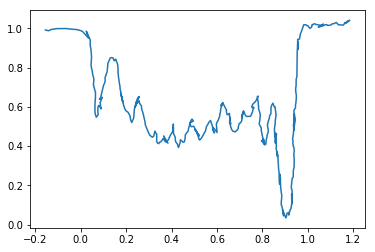

In [231]:
plt.plot(data[:,0], data[:,1])
plt.show()

# Interpolate data

In [232]:
print np.array([[data_interpolated(1.*i/N_points)] for i in range(N_points)]).shape

(250, 1)


In [233]:
print(data[:,0].shape)

(538,)


In [234]:
data_interpolated = scipy.interpolate.interp1d(data[:,0], data[:,1])

N_points = 1000
data_resampled = np.hstack((np.array([[1.*i/N_points] for i in range(N_points)]), np.array([[data_interpolated(1.*i/N_points)] for i in range(N_points)])))

In [235]:
data_resampled = np.hstack((np.ones(len(data_resampled[:,1]))+.005*np.random.rand(len(data_resampled[:,1])), data_resampled[:,1]))
data_resampled = np.hstack((data_resampled, np.ones(len(data_resampled))+.005*np.random.rand(len(data_resampled))))

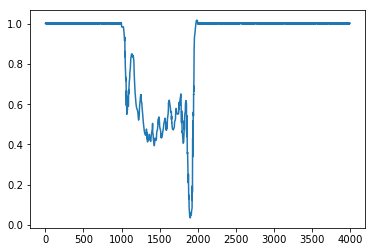

In [236]:
plt.plot(data_resampled)
plt.show()

# Perform moving average

In [237]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [25,50,100]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

# Add noise

In [238]:
cmap = plt.get_cmap('viridis')

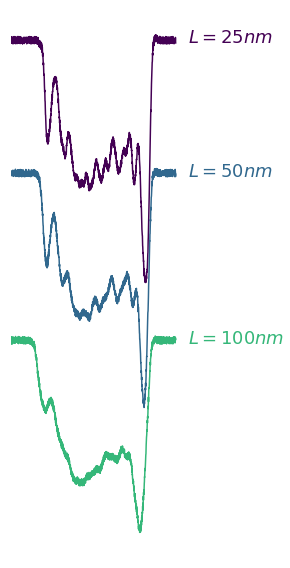

In [239]:


fig = plt.figure(figsize = (4,8))
    
offset = .5
for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .03*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    plt.plot(noisy_simulated[750:2150]-i*offset, color = cmap(1.*i/len(window_widths)))
    plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=' + str(window_widths[i]) + ' nm$', size = 18, color = cmap(1.*i/len(window_widths)), ha = 'left')

for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlim(0,2200)

fig.tight_layout()


plt.savefig('plain_signals_smoothed.png', dpi = 100)

plt.show()

# Mystery signal

In [240]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [150]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

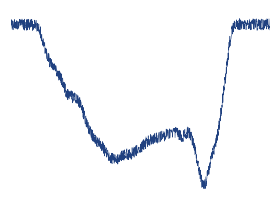

In [241]:


fig = plt.figure(figsize = (4,3))
    
offset = .5
for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .05*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    color = np.array([32,65,128])/255.
    plt.plot(noisy_simulated[750:2150]-i*offset, color = color, lw = .5)
    #plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=???nm$', size = 18, color = color)

for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlim(0,2150-750)

fig.tight_layout()


plt.savefig('mystery_plain_signal_3.png', dpi = 100)

plt.show()

# Moving average diagram

In [242]:
cumsum_vec = np.cumsum(np.insert(data_resampled, 0, 0))
window_widths = [25,150]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

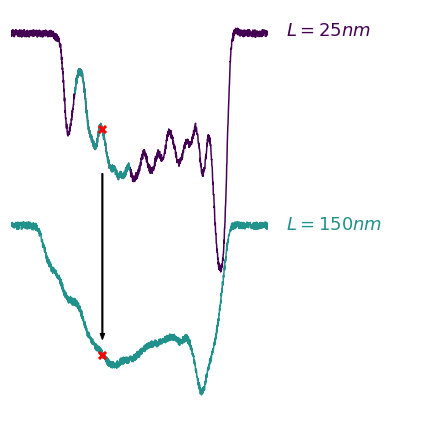

In [268]:
fig = plt.figure(figsize = (6,6))
    
offset = .5

x = 500

for i in range(len(window_widths)):
    noisy_simulated = np.copy(ma_vecs[i])
    for j in range(noisy_simulated.shape[0]):
        noisy_simulated[j] += .03*np.random.rand()
        
    noisy_simulated = noisy_simulated - np.min(noisy_simulated)
    plt.plot(noisy_simulated[750:2150]-i*offset, color = cmap(1.*i/len(window_widths)))
    plt.text(1500, np.max(noisy_simulated)-.03 - i*offset, r'$L=' + str(window_widths[i]) + ' nm$', size = 18, color = cmap(1.*i/len(window_widths)), ha = 'left')

    if i == 0:
        plt.plot(range(x-150,x+150), noisy_simulated[750:2150][x-150:x+150]-i*offset, color = cmap(0.5))
        
    plt.scatter(x, noisy_simulated[750:2150][x]-i*offset, c = 'red', marker = 'x', lw = 3, s = 50, zorder = 10)
    

# Arrow
plt.gca().arrow(x,0.4,0,-.65, width = 6, head_width = 25, head_length = .025, color = 'k')

    
# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlim(0,2200)

fig.tight_layout()


plt.savefig('moving_average_process.png', dpi = 100)

plt.show()